In [384]:
from __future__ import division
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm, tqdm_pandas
tqdm_pandas(tqdm())
import xgboost as xgb
from sklearn.cross_validation import train_test_split
from geopy.distance import great_circle
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()






0it [00:00, ?it/s]

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,11 mins 20 secs
H2O cluster version:,3.10.4.8
H2O cluster version age:,2 months and 22 days
H2O cluster name:,H2O_from_python_shubhankar_hjmq5j
H2O cluster total nodes:,1
H2O cluster free memory:,1.546 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [385]:
train = pd.read_csv("train.csv")
train.columns = [i.strip() for i in train.columns]

In [386]:
test = pd.read_csv("test.csv")
test.columns = [i.strip() for i in test.columns]

In [387]:
labels = pd.read_csv("labels.csv")
labels.columns = [i.strip() for i in labels.columns]

In [388]:
sub = pd.read_csv("sample_submission.csv")
sub.columns = [i.strip() for i in sub.columns]

In [389]:
#Convert Distances into numeric

train["distFromLaneLineOnLeft"] = pd.to_numeric(train["distFromLaneLineOnLeft"], errors="coerce")
train["distFromLaneLineOnRight"] = pd.to_numeric(train["distFromLaneLineOnRight"], errors="coerce")

test["distFromLaneLineOnLeft"] = pd.to_numeric(test["distFromLaneLineOnLeft"], errors="coerce")
test["distFromLaneLineOnRight"] = pd.to_numeric(test["distFromLaneLineOnRight"], errors="coerce")

In [64]:
# test_roadlines = test[["roadId", "totalLaneLines"]]
# test_roadlines["noOfLanes"] = test_roadlines["totalLaneLines"] - 1
# test_roadlines = test_roadlines[["roadId", "totalLaneLines"]].drop_duplicates()

# test_roadlines = test_roadlines.loc[test_roadlines.groupby("roadId")["totalLaneLines"].idxmax()]
# test_roadlines.columns = ["roadId", "noOfLanes"]

# test_roadlines.to_csv("total_minus_one.csv", index = False)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
# train = pd.merge(train, labels, on="roadId", how="inner")

In [268]:
# def get_coordinates(row):
    
#     coords = row.roadCoordinates.strip().split("|")
#     lat = 0
#     lon = 0
    
#     for i in coords:
#         lat_coord, lon_coord = i.split(" ")
#         lat += float(lat_coord)
#         lon += float(lon_coord)

#     lat /= len(coords)
#     lon /= len(coords)
    
#     return pd.Series({"latitude": int(lat),
#                       "longitude": int(lon)
#                     })

# labels = pd.concat([labels, labels.apply(get_coordinates, axis = 1)], axis = 1)

In [390]:
def get_df_coordinates(row):
    
    coords = row.laneLineCoordinates.strip().split("|")
    lat = 0
    lon = 0
    
    for i in coords:
        lat_coord, lon_coord = i.split(" ")
        lat += float(lat_coord)
        lon += float(lon_coord)

    lat /= len(coords)
    lon /= len(coords)
    
    return pd.Series({"latitude": lat,
                      "longitude": lon
                    })

train = pd.concat([train, train.apply(get_df_coordinates, axis = 1)], axis = 1)
test = pd.concat([test, test.apply(get_df_coordinates, axis = 1)], axis = 1)

In [257]:
# dist = {}

# for i in tqdm(range(0, len(labels))):
        
#     proxy_sum = 0
#     proxy_count = 0
    
#     first_label = labels.iloc[i]
#     first_loc = (first_label.latitude, first_label.longitude)
    
#     dist[first_label.roadId] = {}
    
#     for j in range(i, len(labels)):
        
#         second_label = labels.iloc[j]
#         second_loc = (second_label.latitude, second_label.longitude)

#         dist[first_label.roadId][second_label.roadId] = great_circle(first_loc, second_loc)
        
# #         if great_circle(row_loc, iter_loc).km < 5:
# #             proxy_count += 1
# #             proxy_sum += iter_row.noOfLanes
    

# # labels.progress_apply(get_proxy_by_coords, axis = 1)






  0%|          | 0/4825 [00:00<?, ?it/s]




  0%|          | 1/4825 [00:01<2:02:59,  1.53s/it]




  0%|          | 2/4825 [00:02<1:56:54,  1.45s/it]




  0%|          | 3/4825 [00:04<1:51:02,  1.38s/it]








  0%|          | 4/4825 [00:05<1:50:15,  1.37s/it]




  0%|          | 5/4825 [00:06<1:48:06,  1.35s/it]




  0%|          | 6/4825 [00:08<1:50:58,  1.38s/it]




  0%|          | 7/4825 [00:09<1:49:32,  1.36s/it]




  0%|          | 8/4825 [00:10<1:51:44,  1.39s/it]




  0%|          | 9/4825 [00:12<1:48:44,  1.35s/it]




  0%|          | 10/4825 [00:13<1:47:54,  1.34s/it]




  0%|          | 11/4825 [00:14<1:47:35,  1.34s/it]




  0%|          | 12/4825 [00:16<1:44:49,  1.31s/it]




  0%|          | 13/4825 [00:17<1:42:59,  1.28s/it]




  0%|          | 14/4825 [00:18<1:53:11,  1.41s/it]




  0%|          | 15/4825 [00:20<1:56:45,  1.46s/it]




  0%|          | 16/4825 [00:21<1:50:36,  1.38s/it]




  0%|          | 17/4825 [00:23<1:49:53,  1.37s/it]




  0

KeyboardInterrupt: 

In [296]:
# def get_proxy(row):
    
#     nearby_roads = labels[labels.latitude == row.latitude]
#     nearby_roads = nearby_roads[nearby_roads.longitude == row.longitude]
    
#     return np.mean(nearby_roads.noOfLanes)
    
# labels["proxy_lanes"] = labels.progress_apply(get_proxy, axis = 1)
# test["proxy_lanes"] = test.progress_apply(get_proxy, axis = 1)











  0%|          | 0/16 [00:00<?, ?it/s]









30it [00:00, 295.67it/s]              









90it [00:00, 348.39it/s]









137it [00:00, 376.55it/s]









199it [00:00, 424.93it/s]









255it [00:00, 457.29it/s]









319it [00:00, 498.08it/s]









370it [00:00, 486.08it/s]









422it [00:00, 493.27it/s]









480it [00:00, 515.96it/s]









538it [00:01, 531.57it/s]









592it [00:01, 532.34it/s]









646it [00:01, 503.54it/s]









697it [00:01, 428.70it/s]









743it [00:01, 387.89it/s]









785it [00:01, 381.34it/s]









833it [00:01, 405.22it/s]









882it [00:01, 423.91it/s]









926it [00:01, 394.11it/s]









967it [00:02, 359.92it/s]









1005it [00:02, 356.15it/s]









1052it [00:02, 383.95it/s]









1096it [00:02, 398.10it/s]









1147it [00:02, 425.63it/s]









1211it [00:02, 471.87it/s]









1261it [00:02, 472.25it/s]









1315it [00:02, 488.96it/s]









1366it [00:02

In [778]:
def get_features(row, train_test):
    
    if train_test == 1:
        road_lanes = train[train.roadId == row.roadId]
    else:
        road_lanes = test[test.roadId == row.roadId]
    
    mean_total_lanes = np.mean(road_lanes["totalLaneLines"])
    
    lanes_identified = len(road_lanes["laneLineId"].drop_duplicates())
    compression_factor = lanes_identified/len(road_lanes)

    road_length = road_lanes.iloc[0]["roadLength"]

    mean_lane_length = np.mean(road_lanes["laneLineLength"])
    
    lane_road_ratio = mean_lane_length/road_length
    max_lane_road_ratio = max(road_lanes["laneLineLength"])/road_length
    max_lane_road_diff_ratio = abs(max(road_lanes["laneLineLength"]) - road_length)/road_length
    
    middle_lane_road_ratio = np.mean(road_lanes[road_lanes.isIntersectingWithRoadGeometry == " true"]["laneLineLength"])/road_length
    
    intersecting_count = np.sum([1 if i.strip() == "true" else 0 for i in road_lanes["isIntersectingWithRoadGeometry"]])/len(road_lanes)

    road_category = road_lanes.iloc[0]["roadCategory"] > 1 
    
    intersecting_lane_lines_left = np.sum(road_lanes.noOfIntersectingLaneLinesLeft)
    mean_intersecting_lines = np.mean(road_lanes.noOfIntersectingLaneLinesLeft + road_lanes.noOfIntersectingLaneLinesRight)
#     intersecting_lane_lines_right = np.sum(road_lanes.noOfIntersectingLaneLinesRight)
#     intersecting_lane_lines = intersecting_lane_lines_left + intersecting_lane_lines_right
    
#     mean_lane_width = pd.to_numeric(road_lanes["distFromLaneLineOnLeft"], errors="coerce").mean(skipna = True)
    mean_lane_width_left = road_lanes["distFromLaneLineOnLeft"].mean(skipna = True)
    mean_lane_width_right = road_lanes["distFromLaneLineOnRight"].mean(skipna = True)
    
    min_diff_road_lane_length = min(abs(road_lanes["roadLength"] - road_lanes["laneLineLength"]))
    
    total_road_width = (mean_lane_width_left + mean_lane_width_right)*lanes_identified/2
    
    road_aspect_ratio = road_length/total_road_width
#     lane_aspect_ratio = np.mean((road_lanes["distFromLaneLineOnLeft"] + road_lanes["distFromLaneLineOnRight"])/(2*road_lanes["laneLineLength"]))
    
    mean_diff_left_right = (abs(road_lanes["distFromLaneLineOnLeft"] - road_lanes["distFromLaneLineOnRight"])).mean()

#     mean_ratio_left_right = (road_lanes["distFromLaneLineOnLeft"]/road_lanes["distFromLaneLineOnRight"]).mean()
#     mean_ratio_right_left = (road_lanes["distFromLaneLineOnRight"]/road_lanes["distFromLaneLineOnLeft"]).mean()
    
#     print road_lanes.loc[road_lanes.groupby("laneLineId")["distFromLaneLineOnLeft"].idxmax()]["distFromLaneLineOnLeft"]
    try:
#         sum_left_dist = np.sum(road_lanes.groupby("laneLineId")["distFromLaneLineOnLeft"].min())
#         sum_right_dist = np.sum(road_lanes.groupby("laneLineId")["distFromLaneLineOnRight"].min())
        sum_left_dist = np.nansum(road_lanes["distFromLaneLineOnLeft"])
        sum_right_dist = np.nansum(road_lanes["distFromLaneLineOnRight"])

    except:
        sum_left_dist = 0
        sum_right_dist = 0
        
    min_dist_lane = 0
    
    for i in range(0, len(road_lanes)):

        i_loc = road_lanes.iloc[i]
        
        min_distance = 32768
        
        for j in range(0, len(road_lanes)):
           
            if i != j:
                
                j_loc = road_lanes.iloc[j]
                
                local_distance = great_circle((i_loc.latitude, i_loc.longitude), (j_loc.latitude, j_loc.longitude)).km
                
                if local_distance < min_distance:
                    min_distance = local_distance                    
        
        min_dist_lane += min_distance
        
    min_dist_lane /= len(road_lanes)
        
    return pd.Series({"roadId": row.roadId,
#                       "mean_total_lanes": mean_total_lanes, 
                      "lanes_identified": lanes_identified,
                      "compression_factor": compression_factor,
                      "road_length": road_length,
                      "mean_lane_length": mean_lane_length,#
                      "lane_road_ratio": lane_road_ratio,
                      "max_lane_road_ratio": max_lane_road_ratio,
                      "max_lane_road_diff_ratio": max_lane_road_diff_ratio,
                      "intersecting_count": intersecting_count,
                      "intersecting_lane_lines_left": intersecting_lane_lines_left,
#                       "mean_intersecting_lines": mean_intersecting_lines,
                      "middle_lane_road_ratio": middle_lane_road_ratio,#
                      "mean_lane_width_left": mean_lane_width_left,
                      "mean_lane_width_right": mean_lane_width_right,
                      "min_diff_road_lane_length": min_diff_road_lane_length,
                      "total_road_width": total_road_width,
                      "road_aspect_ratio": road_aspect_ratio,#
#                       "lane_aspect_ratio": lane_aspect_ratio,
                      "road_category": road_category,
                      "mean_diff_left_right": mean_diff_left_right,
                      "min_dist_lane": min_dist_lane,
                      "sum_left_dist": sum_left_dist,
                      "sum_right_dist": sum_right_dist
                     })

In [779]:
unique_road_id = pd.DataFrame(np.unique(train.roadId))
unique_road_id.columns = ["roadId"]
train_feats = unique_road_id.progress_apply(get_features, axis = 1, train_test = 1)

unique_road_id = pd.DataFrame(np.unique(test.roadId))
unique_road_id.columns = ["roadId"]
test_feats = unique_road_id.progress_apply(get_features, axis = 1, train_test = 0)








  0%|          | 0/1 [00:00<?, ?it/s]






7it [00:00, 64.22it/s]               






14it [00:00, 63.34it/s]






20it [00:00, 59.29it/s]






24it [00:00, 40.94it/s]






32it [00:00, 46.06it/s]






37it [00:00, 37.76it/s]






41it [00:00, 36.72it/s]






47it [00:01, 39.88it/s]






52it [00:01, 25.32it/s]






56it [00:01, 20.93it/s]






61it [00:01, 24.96it/s]






71it [00:01, 30.40it/s]






79it [00:02, 36.92it/s]






87it [00:02, 40.49it/s]






93it [00:02, 32.63it/s]






98it [00:02, 35.73it/s]






104it [00:02, 39.32it/s]






113it [00:02, 44.91it/s]






121it [00:02, 50.69it/s]






127it [00:03, 47.96it/s]






133it [00:03, 49.23it/s]






139it [00:03, 49.57it/s]






145it [00:03, 51.89it/s]






151it [00:03, 48.95it/s]






157it [00:03, 46.72it/s]






162it [00:03, 41.54it/s]






167it [00:04, 39.60it/s]






175it [00:04, 46.35it/s]






181it [00:04, 46.02it/s]






186it [00:04, 39.37it/s]






191it [00:04, 34.80it

1056it [00:22, 62.14it/s]






1066it [00:22, 68.68it/s]






1076it [00:23, 73.06it/s]






1084it [00:23, 74.65it/s]






1096it [00:23, 82.57it/s]






1105it [00:23, 81.94it/s]






1114it [00:23, 80.10it/s]






1123it [00:23, 72.49it/s]






1131it [00:23, 57.21it/s]






1141it [00:23, 65.21it/s]






1150it [00:24, 71.08it/s]






1159it [00:24, 59.50it/s]






1170it [00:24, 68.18it/s]






1178it [00:24, 49.99it/s]






1187it [00:24, 57.18it/s]






1195it [00:24, 60.40it/s]






1203it [00:25, 58.56it/s]






1210it [00:25, 53.59it/s]






1216it [00:25, 52.35it/s]






1222it [00:25, 50.64it/s]






1228it [00:25, 52.30it/s]






1234it [00:25, 42.25it/s]






1240it [00:25, 45.88it/s]






1246it [00:26, 43.62it/s]






1254it [00:26, 50.18it/s]






1260it [00:26, 44.49it/s]






1265it [00:26, 43.56it/s]






1273it [00:26, 41.65it/s]






1278it [00:27, 17.18it/s]






1284it [00:27, 21.73it/s]






1289it [00:28, 11.85it/s]






1293it [

2255it [00:46, 65.37it/s]






2263it [00:46, 67.20it/s]






2271it [00:46, 70.40it/s]






2279it [00:47, 62.52it/s]






2286it [00:47, 58.91it/s]






2293it [00:47, 59.79it/s]






2300it [00:47, 35.39it/s]






2305it [00:47, 26.06it/s]






2313it [00:48, 31.64it/s]






2321it [00:48, 37.78it/s]






2327it [00:48, 31.44it/s]






2332it [00:48, 32.93it/s]






2339it [00:48, 38.46it/s]






2348it [00:48, 46.27it/s]






2355it [00:48, 50.81it/s]






2362it [00:49, 53.33it/s]






2369it [00:49, 56.94it/s]






2376it [00:49, 52.93it/s]






2387it [00:49, 61.75it/s]






2395it [00:49, 65.61it/s]






2403it [00:49, 48.61it/s]






2409it [00:50, 15.33it/s]






2414it [00:51, 14.83it/s]






2422it [00:51, 19.41it/s]






2427it [00:51, 22.65it/s]






2432it [00:51, 26.63it/s]






2437it [00:51, 25.09it/s]






2448it [00:51, 32.55it/s]






2457it [00:51, 39.20it/s]






2467it [00:52, 47.82it/s]






2475it [00:52, 44.33it/s]






2486it [

3486it [01:14, 65.52it/s]






3495it [01:14, 69.63it/s]






3503it [01:14, 69.44it/s]






3513it [01:14, 73.02it/s]






3525it [01:14, 82.54it/s]






3534it [01:14, 74.00it/s]






3543it [01:14, 49.60it/s]






3553it [01:15, 57.79it/s]






3561it [01:15, 60.65it/s]






3569it [01:15, 64.21it/s]






3580it [01:15, 71.61it/s]






3589it [01:15, 73.64it/s]






3600it [01:15, 80.53it/s]






3612it [01:15, 87.93it/s]






3623it [01:15, 90.68it/s]






3633it [01:15, 84.91it/s]






3642it [01:16, 47.47it/s]






3649it [01:16, 51.66it/s]






3656it [01:16, 56.06it/s]






3663it [01:16, 56.59it/s]






3672it [01:16, 62.77it/s]






3680it [01:16, 64.95it/s]






3688it [01:17, 57.86it/s]






3695it [01:17, 50.47it/s]






3703it [01:17, 55.90it/s]






3712it [01:17, 62.18it/s]






3723it [01:17, 70.64it/s]






3733it [01:17, 76.88it/s]






3742it [01:17, 79.70it/s]






3751it [01:17, 82.19it/s]






3764it [01:17, 91.93it/s]






3774it [

4775it [01:37, 81.67it/s]






4787it [01:37, 65.75it/s]






4795it [01:38, 56.07it/s]






4806it [01:38, 61.16it/s]






4813it [01:38, 63.18it/s]






4820it [01:38, 61.22it/s]






4826it [01:38, 48.76it/s]






  0%|          | 0/1 [00:00<?, ?it/s]






10it [00:00, 96.73it/s]              






17it [00:00, 76.27it/s]






25it [00:00, 72.79it/s]






34it [00:00, 75.85it/s]






41it [00:00, 64.60it/s]






47it [00:00, 44.98it/s]






58it [00:00, 53.90it/s]






66it [00:01, 56.26it/s]






73it [00:01, 49.70it/s]






79it [00:01, 44.70it/s]






86it [00:01, 49.71it/s]






92it [00:01, 49.55it/s]






102it [00:01, 57.69it/s]






109it [00:01, 51.87it/s]






121it [00:02, 61.50it/s]






129it [00:02, 37.83it/s]






135it [00:02, 41.43it/s]






142it [00:02, 45.76it/s]






148it [00:02, 34.10it/s]






153it [00:03, 28.42it/s]






157it [00:03, 30.55it/s]






168it [00:03, 38.60it/s]






174it [00:03, 37.14it/s]






181it [00:03, 43.

In [780]:
train_feats.to_csv("train_feats.csv", index = False)
test_feats.to_csv("test_feats.csv", index = False)

In [781]:
train_feats = pd.read_csv("train_feats.csv")
test_feats = pd.read_csv("test_feats.csv")

In [763]:
# train_feats.drop("", axis = 1, inplace = True)
# test_feats.drop("", axis = 1, inplace = True)

In [782]:
def dummify_road_category(df):
    dummies = pd.get_dummies(df.road_category)
        
    dummies.columns = ["category_one", "category_gt_one"]
    
    df = pd.concat([df, dummies], axis = 1)
    df = df.drop("road_category", axis = 1)
        
    return df

train_feats = dummify_road_category(train_feats)
test_feats = dummify_road_category(test_feats)

In [783]:
train_feats = pd.merge(train_feats, labels[["roadId", "noOfLanes"]], on="roadId", how="inner")
train_feats["noOfLanes"] = train_feats["noOfLanes"] - 1

#Proxy lane
# train_feats = pd.merge(train_feats, labels[["roadId", "noOfLanes", "proxy_lanes"]], on="roadId", how="inner")
# test_feats = pd.merge(test_feats, test[["roadId", "proxy_lanes"]], on="roadId", how="inner")

In [784]:
# def run_gbm(x_train):

#     h2o.remove_all()                          
#     h2o.init(max_mem_size = "2G")             
    
#     gbm = H2OGradientBoostingEstimator(
#             ntrees=1000,
#             learn_rate=0.3,
#             max_depth=10,
# #             distribution="multinomial",
#             sample_rate=0.7,
#             col_sample_rate=0.7,
#             stopping_rounds=2,
#             stopping_tolerance=0.001, #10-fold increase in threshold as defined in rf_v1
#             score_each_iteration=True,
#             model_id="gbm_covType_v3",
#             seed=2000000
#         )

#     hf_train = h2o.H2OFrame(x_train)
    
#     gbm.train(hf_train.col_names[:-1], hf_train.col_names[-1], training_frame = hf_train)
    
#     return gbm

In [785]:
# # train_feats = pd.concat([train_feats, no_of_lanes], axis = 1)

# # train_feats.noOfLanes = train_feats.noOfLanes.astype("category")
# gbm = run_gbm(train_feats)

# test_feats.drop("middle_lane_road_ratio", axis = 1, inplace = True)

# hf_test = h2o.H2OFrame(test_feats)
# gbm_pred = gbm.predict(hf_test)

# h2o.export_file(gbm_pred,"gbm_1.csv")

In [786]:
# gbm_res = pd.DataFrame()

# gbm_pred = pd.read_csv("gbm_1.csv")

# gbm_res["roadId"] = test_feats.roadId
# gbm_res["noOfLanes"] = gbm_pred.predict.astype(int) + 1

# gbm_res.to_csv("gbm_2.csv", index = False)

In [796]:
def run_xgb(train, label_train, valid = None, label_valid = None):

    # Set our parameters for xgboost
    params = {}
    params['objective'] = 'multi:softmax'
    params['num_class'] = 6
    params['eta'] = 0.025
    params['max_depth'] = 6
    params['silent'] = 1
    params['min_child_weight'] = 0
    params['subsample'] = 0.8
    params['colsample_bytree'] = 0.8
    params['nthread'] = 13
    params['gamma'] = 0.1
    params['max_delta_step'] = 0

    d_train = xgb.DMatrix(train, label=label_train)
    
    if valid is not None:
        d_valid = xgb.DMatrix(valid, label=label_valid)
        watchlist = [(d_train, 'train'), (d_valid, 'validation')]
    else:
        watchlist = [(d_train, 'train')]
        
    bst = xgb.train(params, d_train, 200, watchlist, early_stopping_rounds=10, verbose_eval=50)
    
    return bst

In [788]:
no_of_lanes = train_feats["noOfLanes"]
train_feats.drop("noOfLanes", axis = 1, inplace = True)
train_feats.drop("roadId", axis = 1, inplace = True)

roadIds = test_feats["roadId"]
test_feats.drop("roadId", axis = 1, inplace = True)

In [789]:
x_train, x_valid, label_train, label_valid = train_test_split(train_feats, no_of_lanes, test_size=0.2, random_state=4242, stratify = no_of_lanes)

In [797]:
def xgb_explore():
    
    bst = run_xgb(train_feats, no_of_lanes)
#     bst = run_xgb(x_train, label_train, x_valid, label_valid)

    import operator
    importance = bst.get_fscore()
    importance = sorted(importance.items(), key=operator.itemgetter(1))

    df_imp = pd.DataFrame(importance, columns=['feature', 'fscore'])
    df_imp['fscore'] = df_imp['fscore']/df_imp['fscore'].sum()

    print df_imp
    return bst

bst = xgb_explore()

[0]	train-merror:0.344663
Will train until train-merror hasn't improved in 10 rounds.
[50]	train-merror:0.268808
[100]	train-merror:0.239793
[150]	train-merror:0.202902
                         feature    fscore
0                category_gt_one  0.003251
1                   category_one  0.014259
2             compression_factor  0.015181
3   intersecting_lane_lines_left  0.020582
4            max_lane_road_ratio  0.035430
5               lanes_identified  0.040140
6             intersecting_count  0.041523
7                    road_length  0.042265
8         middle_lane_road_ratio  0.044313
9                 sum_right_dist  0.044927
10         mean_lane_width_right  0.052684
11             road_aspect_ratio  0.054451
12                 sum_left_dist  0.054604
13          mean_lane_width_left  0.056754
14              total_road_width  0.058982
15      max_lane_road_diff_ratio  0.059212
16     min_diff_road_lane_length  0.060492
17              mean_lane_length  0.062745
18            

In [798]:
def pred_n_sub(test_feats):
    
    d_test = xgb.DMatrix(test_feats)
    p_test = bst.predict(d_test)

    sub = pd.DataFrame()
    sub['roadId'] = roadIds
    sub['noOfLanes'] = p_test + 1
    
    sub['noOfLanes'] = sub['noOfLanes'].astype(int)
    
    sub.drop_duplicates().to_csv("./xgb_9.csv", index=False)

pred_n_sub(test_feats)

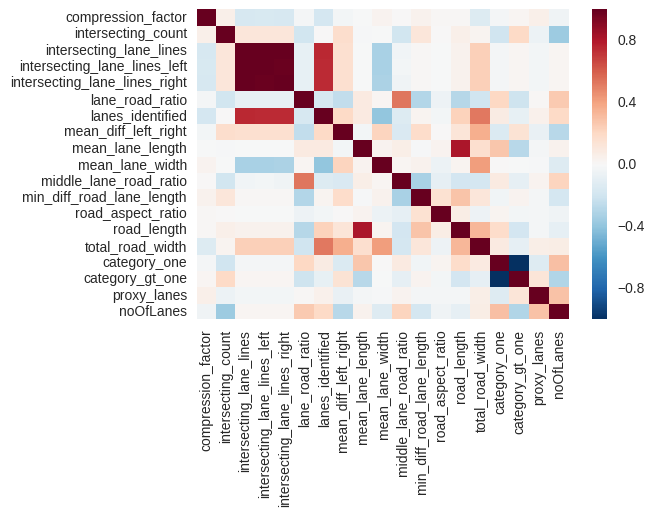

In [311]:
train_feats["noOfLanes"] = no_of_lanes
corr = train_feats.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

plt.show()

In [774]:
train_feats.head()

,compression_factor,intersecting_count,intersecting_lane_lines_left,lane_road_ratio,lanes_identified,max_lane_road_diff_ratio,max_lane_road_ratio,mean_diff_left_right,mean_lane_length,mean_lane_width,middle_lane_road_ratio,min_diff_road_lane_length,min_dist_lane,road_aspect_ratio,road_length,sum_left_dist,sum_right_dist,total_road_width,category_one,category_gt_one
0,1.0,0.40,2,0.954066,5,0.147364,1.147364,3.160774,57.967926,1.677158,1.014326,0.017708,0.003680,7.245455,60.758851,6.708630,6.708630,8.385788,0,1
1,1.0,0.75,2,0.550096,4,0.017269,1.017269,2.945570,148.032466,4.040328,0.702146,4.647230,0.010386,16.651073,269.103155,12.120983,10.861002,16.161310,0,1
2,1.0,0.00,0,0.797594,2,0.002328,0.997672,NaN,119.391427,8.036071,NaN,0.348456,0.058155,9.313595,149.689420,8.036071,8.036071,16.072142,1,0
3,1.0,0.00,0,0.879321,4,0.004359,1.004359,2.028848,26.548858,2.610103,NaN,0.007342,0.006607,2.891882,30.192438,7.830308,7.830308,10.440411,1,0
4,1.0,0.00,0,0.760922,4,0.006770,1.006770,1.372421,571.602330,3.137375,NaN,2.509474,0.097953,59.858757,751.197411,9.412124,9.412124,12.549499,1,0


In [775]:
road_lanes = train[train.roadId == train.iloc[0].roadId]
np.sum(road_lanes.groupby("laneLineId")["distFromLaneLineOnLeft"].mean())

7.3608069819999997